THE SPARKS FOUNDATION
DATA SCIENCE AND BUSINESS ANALYTICS INTERNSHIP JAN21
NAME : Shivam verma
TASK 2 : PREDICTION USING UNSUPERVISED ML
QUESTION: From the given dataset , predict the optimum number of clusters and represent it visually.

IMPORTING THE LIBRARIES

In [1]:
#librarys are import
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


DATA is Imported

In [2]:
#file imported 
dataset = pd.read_csv("dataset.csv")
print("Successfully Data imported " )

Successfully Data imported 


In [3]:
dataset.head(3) #To view

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


In [5]:
iris = dataset.iloc[:,[1,2,3,4]].values

In [6]:

iris

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

ELBOW METHOD

In [7]:
from sklearn.cluster import KMeans

In [8]:
Sum_of_squared_distances = []
K = range(1,10)
optimalK=1
for k in K:
  km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=0)
  km = km.fit(iris)
  Sum_of_squared_distances.append(km.inertia_)

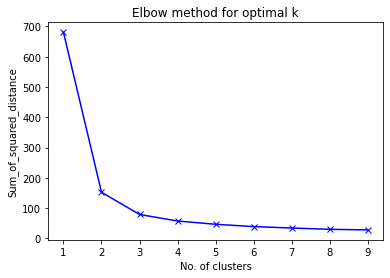

In [9]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Sum_of_squared_distance')
plt.title('Elbow method for optimal k')
plt.show()

In [10]:
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_km = km.fit_predict(iris)

In [11]:
y_km

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

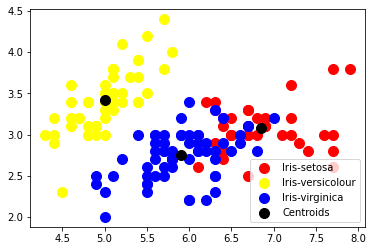

In [12]:
plt.scatter(iris[y_km == 0, 0], iris[y_km == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(iris[y_km == 1, 0], iris[y_km == 1, 1], s = 100, c = 'yellow', label = 'Iris-versicolour')
plt.scatter(iris[y_km == 2, 0], iris[y_km == 2, 1], s = 100, c = 'blue', label = 'Iris-virginica')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')

plt.legend()

In [13]:
from sklearn.decomposition import PCA
mod1 = PCA(n_components=2)
xpca = mod1.fit_transform(iris)

In [14]:
xpca

array([[-2.68420713,  0.32660731],
       [-2.71539062, -0.16955685],
       [-2.88981954, -0.13734561],
       [-2.7464372 , -0.31112432],
       [-2.72859298,  0.33392456],
       [-2.27989736,  0.74778271],
       [-2.82089068, -0.08210451],
       [-2.62648199,  0.17040535],
       [-2.88795857, -0.57079803],
       [-2.67384469, -0.1066917 ],
       [-2.50652679,  0.65193501],
       [-2.61314272,  0.02152063],
       [-2.78743398, -0.22774019],
       [-3.22520045, -0.50327991],
       [-2.64354322,  1.1861949 ],
       [-2.38386932,  1.34475434],
       [-2.6225262 ,  0.81808967],
       [-2.64832273,  0.31913667],
       [-2.19907796,  0.87924409],
       [-2.58734619,  0.52047364],
       [-2.3105317 ,  0.39786782],
       [-2.54323491,  0.44003175],
       [-3.21585769,  0.14161557],
       [-2.30312854,  0.10552268],
       [-2.35617109, -0.03120959],
       [-2.50791723, -0.13905634],
       [-2.469056  ,  0.13788731],
       [-2.56239095,  0.37468456],
       [-2.63982127,

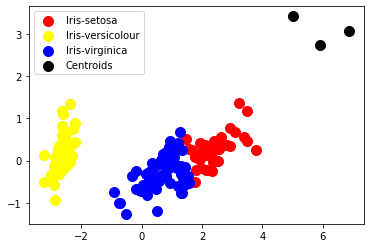

In [15]:
plt.scatter(xpca[y_km == 0, 0], xpca[y_km == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(xpca[y_km == 1, 0], xpca[y_km == 1, 1], s = 100, c = 'yellow', label = 'Iris-versicolour')
plt.scatter(xpca[y_km == 2, 0], xpca[y_km == 2, 1], s = 100, c = 'blue', label = 'Iris-virginica')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')

plt.legend()

In [16]:
dataset['pca_y'] = xpca[:,0]
dataset['pca_x'] = xpca[:,1]

In [17]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,pca_y,pca_x
0,1,5.1,3.5,1.4,0.2,Iris-setosa,-2.684207,0.326607
1,2,4.9,3.0,1.4,0.2,Iris-setosa,-2.715391,-0.169557
2,3,4.7,3.2,1.3,0.2,Iris-setosa,-2.889820,-0.137346
3,4,4.6,3.1,1.5,0.2,Iris-setosa,-2.746437,-0.311124
4,5,5.0,3.6,1.4,0.2,Iris-setosa,-2.728593,0.333925


In [18]:
dataset.drop("Species", axis=1, inplace=True)

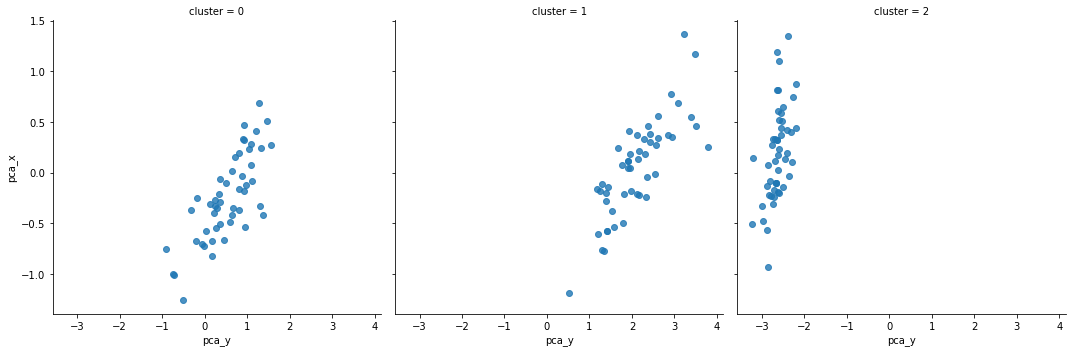

In [19]:
from sklearn.mixture import GaussianMixture
mod1 = GaussianMixture(n_components=3, covariance_type = 'full')
mod1 = mod1.fit(dataset)
y1 = mod1.predict(dataset)
dataset['cluster'] = y1
sns.lmplot('pca_y','pca_x',data=dataset,col='cluster',fit_reg=False)